<a href="https://colab.research.google.com/github/nikitasharma1998/capstone-project-in-hotel-booking-analysis/blob/main/Capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Project name**- Hotel Booking Analysis
##### **Contribution**    - Individual
##### **Team Member 1 -**-Nikita sharma

# **Project Summary -**

Write the summary here within 500-600 words.

The Hotel booking analysis project aims to explore and analyse data related to hotel bookings to derive insights that can inform decision-making and improve business operations within hospitality industry.By examining various aspects of hotel booking such as booking patterns ,customer prefrences,seasonal trends and revenue generation,the project seeks to uncover valueable information that can enhance marketing strategies,resource optimization and enhance customers satisfaction.  


# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/nikitasharma1998/capstone-project-in-hotel-booking-analysis

# **Problem Statement**


**Write Problem Statement Here.**

Booking analysis

Customer segmentation

Revenue analysis

Booking cancellation analysis

Predictive analysis

#### **Define Your Business Objective?**

**Analysis booking trends**-explore patterns in booking volume over time,including seasonal variations,peak booking periods and trends influenced by external factors such as holidays or events.

**Customer segmentation**-identify different customer segments based on booking behavior,demographics,prefrences and booking channels.

**Revenue analysis**-Examine revenue generated from different booking channels,room types and customers segments to identify revenue drivers and oppurtunities for optimization.

**Booking cancellation analysis**-analyze the frequency and reason for booking cancellations to understand potential areas for improvement in customer services and  booking policies.

**Predictive analysis**-develop predictive models to forecast future booking trends, cancellation rates and revenue trends to assist in capacity planning and revenue management

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.ticker as mtick



### Dataset Loading

In [33]:
# Load Dataset
df=pd.read_csv('/content/Hotel Bookings-2.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [34]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [42]:
#get last 5 rows
df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
81532,City Hotel,1,218,2016,June,24,9,0,2,2,...,Non Refund,133.0,NaN,0,Transient,135.0,0,0,Canceled,2015-12-14
81533,City Hotel,1,218,2016,June,24,9,0,2,2,...,Non Refund,133.0,NaN,0,Transient,135.0,0,0,Canceled,2015-12-14
81534,City Hotel,1,218,2016,June,24,9,0,2,2,...,Non Refund,133.0,NaN,0,Transient,135.0,0,0,Canceled,2015-12-14
81535,City Hotel,1,218,2016,June,24,9,0,2,2,...,Non Refund,133.0,NaN,0,Transient,135.0,0,0,Canceled,2015-12-14
81536,City Hotel,1,218,2016,June,24,9,0,2,2,...,Non Refund,133.0,NaN,0,Transient,135.0,0,0,Canceled,2015-


### Dataset Rows & Columns count

In [43]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
df.shape




(81537, 32)

### Dataset Information

#### Duplicate Values

In [44]:
# Dataset Info
df.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [37]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()













False    56328
True     25209
dtype: int64

In [38]:
#creating a copy of data set
df1=df.copy()

In [39]:
#droping all duplicate values
df1.drop_duplicates(inplace=True)

In [40]:
#check shape after droping duplicate rows
df1.shape

(56328, 32)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_hotels.isna().sum(axis=0)



hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12057
company                           76928


In [ ]:
#number of unique values
df_hotels.nunique(axis=0)

hotel                                2
is_canceled                          2
lead_time                          478
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            153
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     19
deposit_type                         3
agent                              284
company                            292
days_in_waiting_list     

In [ ]:
for i in df_hotels.columns:
  if df_hotels[i].isna().sum() != 0:
    print('null values in', i, 'column :', df_hotels[i].isna().sum() )

null values in children column : 4
null values in country column : 487
null values in agent column : 12057
null values in company column : 76928


In [ ]:
# Visualizing the missing values
df_hotels.describe()




,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81533.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,69480.000000,4609.000000,81537.000000,81537.000000,81537.000000,81537.000000
mean,0.530520,112.695206,2016.041122,28.165471,15.699327,0.983210,2.669708,1.857034,0.101799,0.008548,0.034083,0.113004,0.153562,0.203956,113.561888,196.211543,2.875713,98.060807,0.071820,0.469860
std,0.499071,112.343339,0.754119,13.652905,8.785585,1.051007,2.073458,0.597639,0.398340,0.103358,0.181443,1.010728,1.680099,0.634970,119.083391,135.180733,20.257558,54.185302,0.262151,0.747791
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,202.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


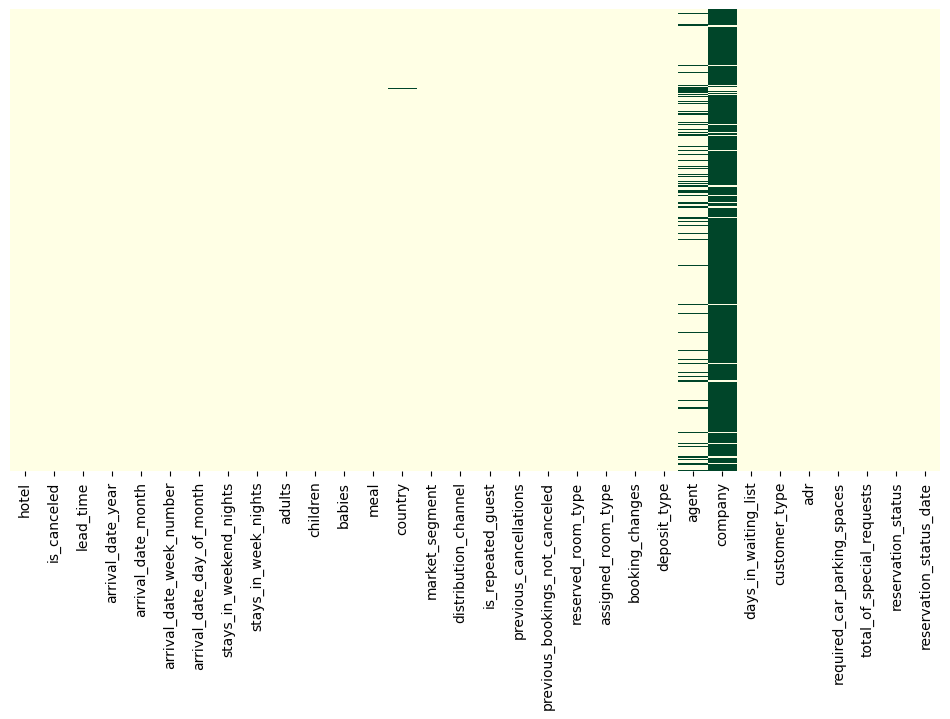

In [22]:
#after removing all null values from the dataset and droping some of the columns we will visualize the dataset
# using heat map
sns.heatmap(df_hotels.isnull(),cbar=False,cmap='YlGn',yticklabels=False)
plt.show()

### What did you know about your dataset?

we can see in our dataset that Correlation reports can be highly useful for hotels as it will give a quick and easy-to-interpret overview of which variables and which departments have the most impact on NPS® and your guests’ likeliness to recommend your hotel. It can help with determining resource allocation more effectively, understanding your guests and where to prioritise marketing efforts, and spotting market trends. Despite the usefulness of correlation reports, they should be used with a hint of caution and not necessarily be the only deciding factor for making key operations. It’s just as important to dive deeper in order to really understand the why behind the correlation coefficient and understanding the practical importance of the correlation.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns



Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81533.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,69480.000000,4609.000000,81537.000000,81537.000000,81537.000000,81537.000000
mean,0.530520,112.695206,2016.041122,28.165471,15.699327,0.983210,2.669708,1.857034,0.101799,0.008548,0.034083,0.113004,0.153562,0.203956,113.561888,196.211543,2.875713,98.060807,0.071820,0.469860
std,0.499071,112.343339,0.754119,13.652905,8.785585,1.051007,2.073458,0.597639,0.398340,0.103358,0.181443,1.010728,1.680099,0.634970,119.083391,135.180733,20.257558,54.185302,0.262151,0.747791
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,202.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

**Variables Description**

**1.Hotel**:Two types of Hotels : City Hotel and Resort Hotel

**2.is_canceled**:if the booking was canceled (1) or not (0)

**3.lead_time** : How many days customer has booked the hotel in advance

**4.arrival_date_year**: year of arrival date
**5.arrival_date_month** : month of arrival date
**6.arrival_date_week_number**:week number for
arrival date
**7.arrival_date_day_of month**: Day of arrival date
**8.stays_in_weekend_nights** :Number of weekend nights (saturday or sunday) the guest satyed or booked to stay at the hotel
**9.stays_in_week_nights **:Number of week nights (Monday to Friday) the guest satyed or booked to stay at the hotel
**10.adults** :Number of adults
**11.children **: Number of children
**12.babies** : Number of babies
**13.meal** :Kind of meal customer has Opted for in the hotel
BB :- Bed & Breakfast
FB :- Full Board (Beakfast, Lunch and Dinner)
HB :- Half Board (Breakfast and Dinner normally)
SC/Undefined :- no meal opted
**14.Country**: Code of the country customer belongs to
**market_segment** :which segment the customer belongs to
**15.distribution_channel** :How the customer has done booking direct/TA/TO
**16.is_repeated_guest** :Guest coming first time (0) or not (1)
**17.previous_cancellations** :Number of booking canceled by the customer prior to current booking
**18.previous_bookings_not_canceled** :count of previous booking sucessfully made by the customer
**19.reserved_room_type **:Type of room reserved by the customer
**20.assigned_room_type **: Type of room assigned to the customer
**21.booking_changes** :count of changes made to booking
**22.deposit_type** : Deposit type opted by the customer
**23.agent** :ID of travel agent who has made the booking
**24.company** :ID of company that made booking
**25.customer_type** :Type of customer
**26.Transient** :when the booking is not part of a group or contract, and is not associated to other transient booking
Contract:when the booking has any type of contract associated with it
Transient_party:when the booking is transient but is associated with at least another transient booking
Group: when the booking is associated with a group
**27.days_in_waiting_list**:Number of days customer had to wait to get booking confirm
**28.adr** :A hotel’s ADR, (Average Daily Rate) is the measure of the average rate paid per room that’s occupied at the property
**29.required_car_parking_spaces** :if car parking is required
**30.total_of_special_requests** : Number of additional special requests made by the customer
**31.reservation_status** :Reservation status whether the customer has checked-in or cancelled or not shown.
**32.reservation_status_date** :Date at which last reservation status was made

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df_hotels['hotel'].unique())
print(df_hotels['is_canceled'].unique())
print(df_hotels['lead_time'].unique())
print(df_hotels['arrival_date_year'].unique())
print(df_hotels['arrival_date_month'].unique())
print(df_hotels['arrival_date_week_number'].unique())
print(df_hotels['arrival_date_day_of_month'].unique())
print(df_hotels['stays_in_weekend_nights'].unique())
print(df_hotels['stays_in_week_nights'].unique())
print(df_hotels['adults'].unique())
print(df_hotels['children'].unique())
print(df_hotels['babies'].unique())
print(df_hotels['meal'].unique())
print(df_hotels['country'].unique())
print(df_hotels['market_segment'].unique())
print(df_hotels['distribution_channel'].unique())
print(df_hotels['is_repeated_guest'].unique())
print(df_hotels['previous_cancellations'].unique())
print(df_hotels['previous_bookings_not_canceled'].unique())
print(df_hotels['reserved_room_type'].unique())
print(df_hotels['assigned_room_type'].unique())
print(df_hotels['booking_changes'].unique())
print(df_hotels['deposit_type'].unique())
print(df_hotels['agent'].unique())
print(df_hotels['company'].unique())
print(df_hotels['days_in_waiting_list'].unique())
print(df_hotels['customer_type'].unique())
print(df_hotels['adr'].unique())
print(df_hotels['required_car_parking_spaces'].unique())
print(df_hotels['total_of_special_requests'].unique())
print(df_hotels['reservation_status'].unique())
print(df_hotels['reservation_status_date'].unique())



['Resort Hotel' 'City Hotel']
[0 1]
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 21

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df1.shape

(81537, 32)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81537 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81537 non-null  object 
 1   is_canceled                     81537 non-null  int64  
 2   lead_time                       81537 non-null  int64  
 3   arrival_date_year               81537 non-null  int64  
 4   arrival_date_month              81537 non-null  object 
 5   arrival_date_week_number        81537 non-null  int64  
 6   arrival_date_day_of_month       81537 non-null  int64  
 7   stays_in_weekend_nights         81537 non-null  int64  
 8   stays_in_week_nights            81537 non-null  int64  
 9   adults                          81537 non-null  int64  
 10  children                        81533 non-null  float64
 11  babies                          81537 non-null  int64  
 12  meal                            

In [ ]:
#converting datatype of "reservation_status_date" from object to datatime
df1['reservation_status_date'] = pd.to_datetime(df_hotels['reservation_status_date'])
df1['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 81537 entries, 0 to 81536
Series name: reservation_status_date
Non-Null Count  Dtype         
--------------  -----         
81537 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 637.1 KB


In [ ]:
#Creating a new column by combining the year, month, and date of arrival together
df1['Arrival date'] = pd.to_datetime(df_hotels.arrival_date_year.astype(str) + '/' + df1.arrival_date_month.astype(str) + '/' + df1.arrival_date_day_of_month.astype(str))
df1['Arrival date']

0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-01
           ...    
81532   2016-06-09
81533   2016-06-09
81534   2016-06-09
81535   2016-06-09
81536   2016-06-09
Name: Arrival date, Length: 81537, dtype: datetime64[ns]

In [ ]:
#Find the number of missing values in every column
np.sum(df1.isnull()).sort_values(ascending= False)

company                           76928
agent                             12057
country                             487
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [24]:
df1['lead_time'].dtype

dtype('int64')

In [45]:
categorical_col=[]
discrete_col=[]
continous_col=[]
for col in df1.columns:
  if df1[col].dtype=='o':
    categorical_col.append(col)
  elif len(df1[col].unique())<=10:
    discrete_col.append(col)
  else:
    continous_col.append(col)



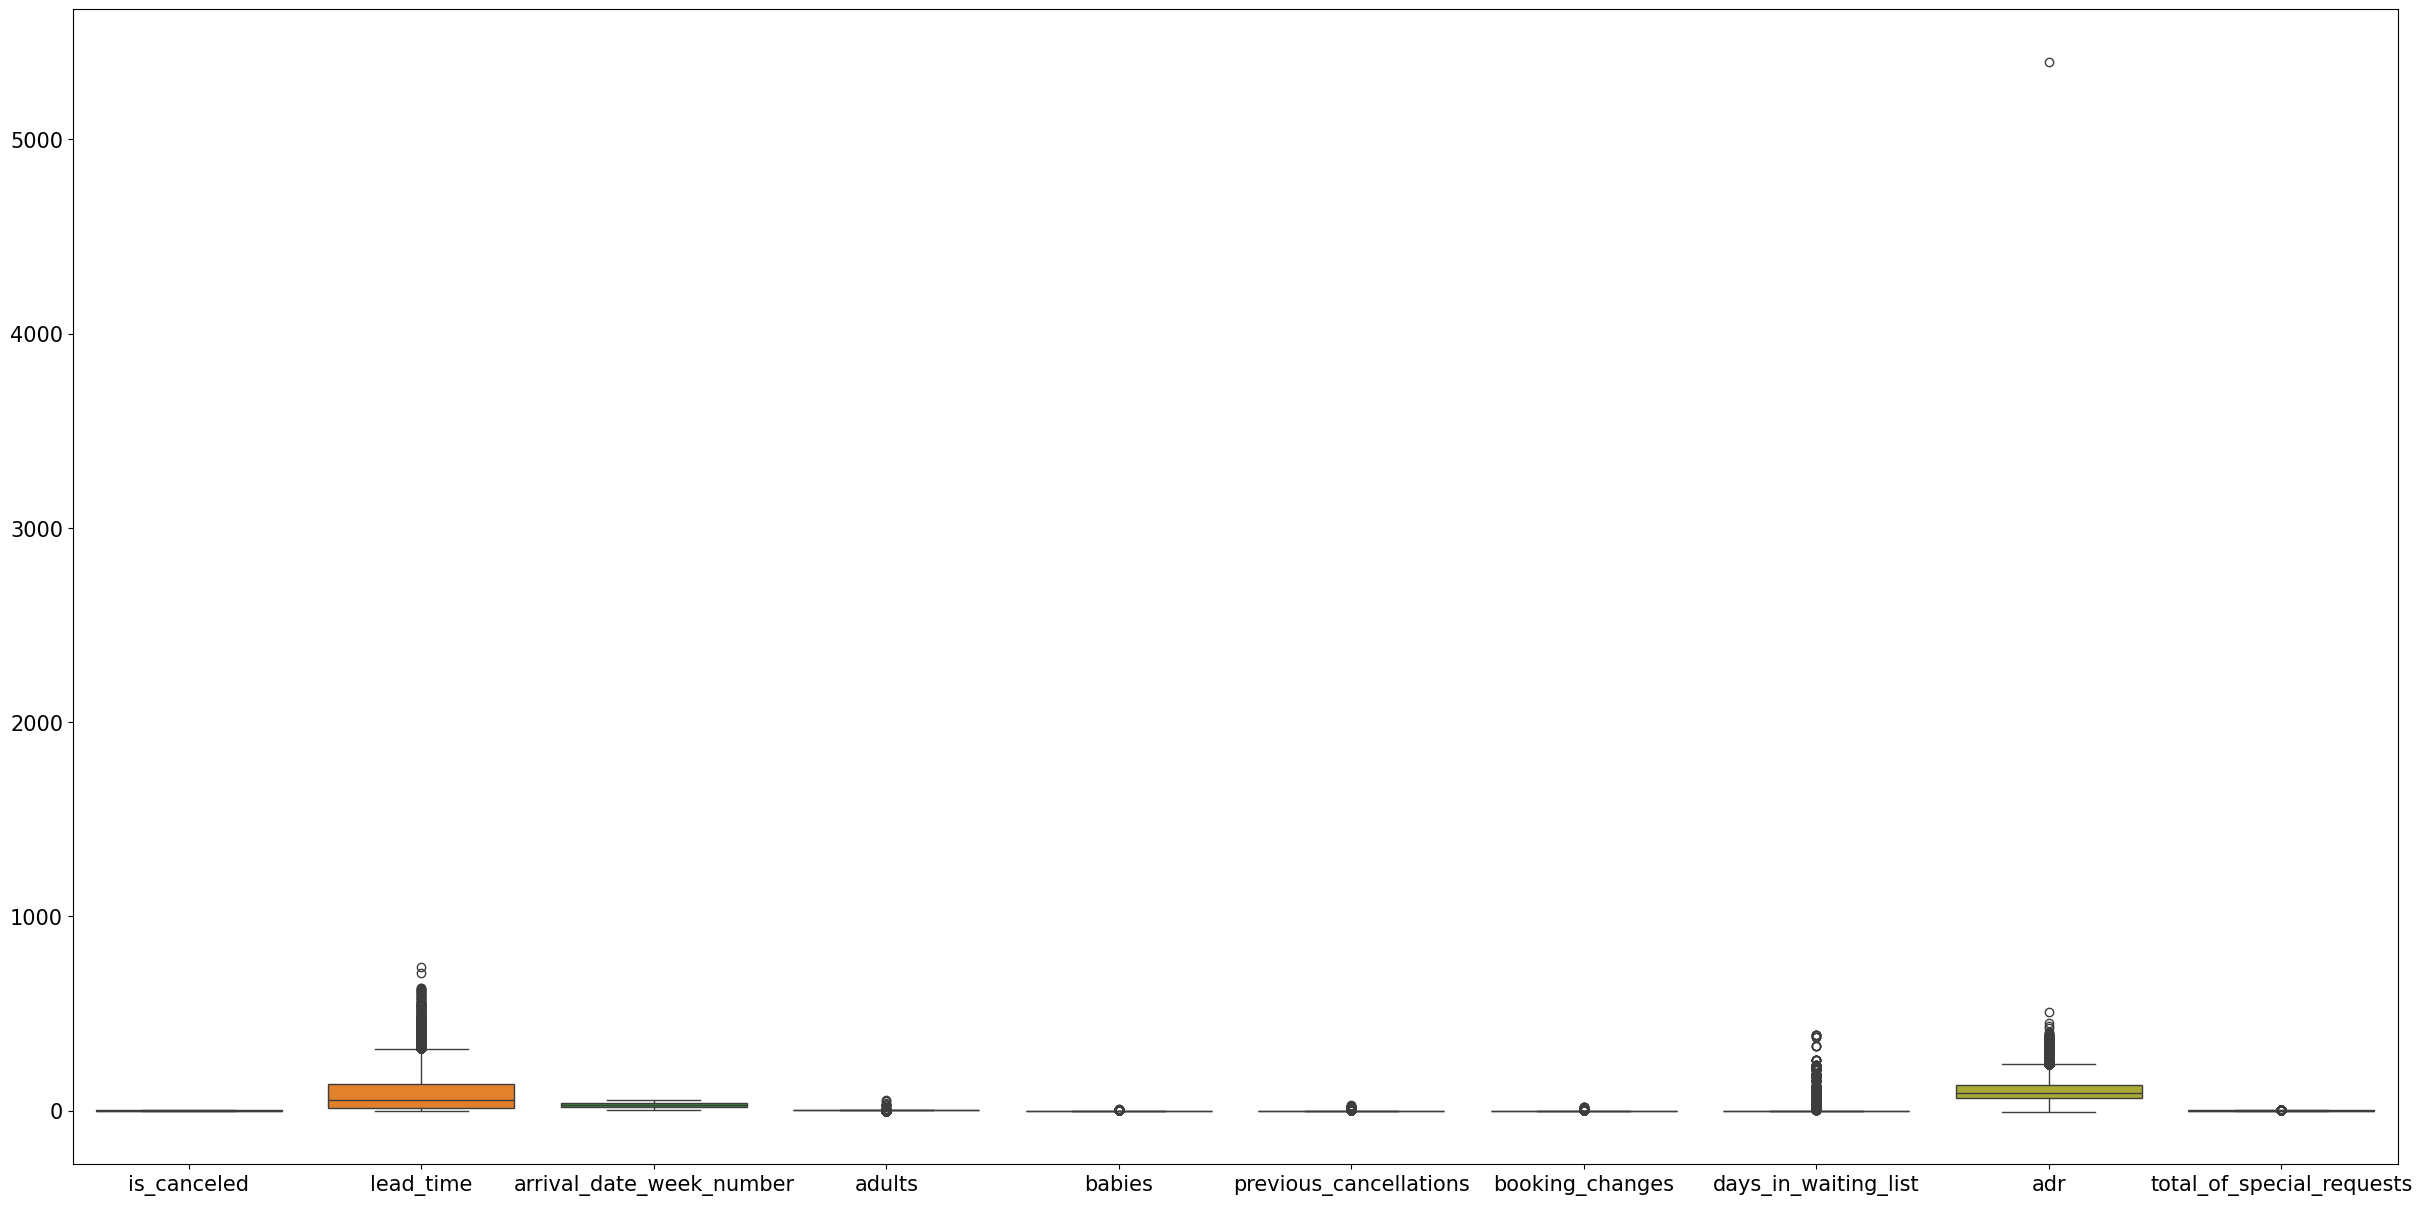

In [46]:
# Write your code to make your dataset analysis ready.
#finding out outlier in each column
plt.rc('font', size=15)
plt.figure(figsize=(30,15))
sns.boxplot(data=df1[['is_canceled','lead_time','arrival_date_week_number','adults','babies','previous_cancellations','booking_changes','days_in_waiting_list','adr','total_of_special_requests']])
plt.show()


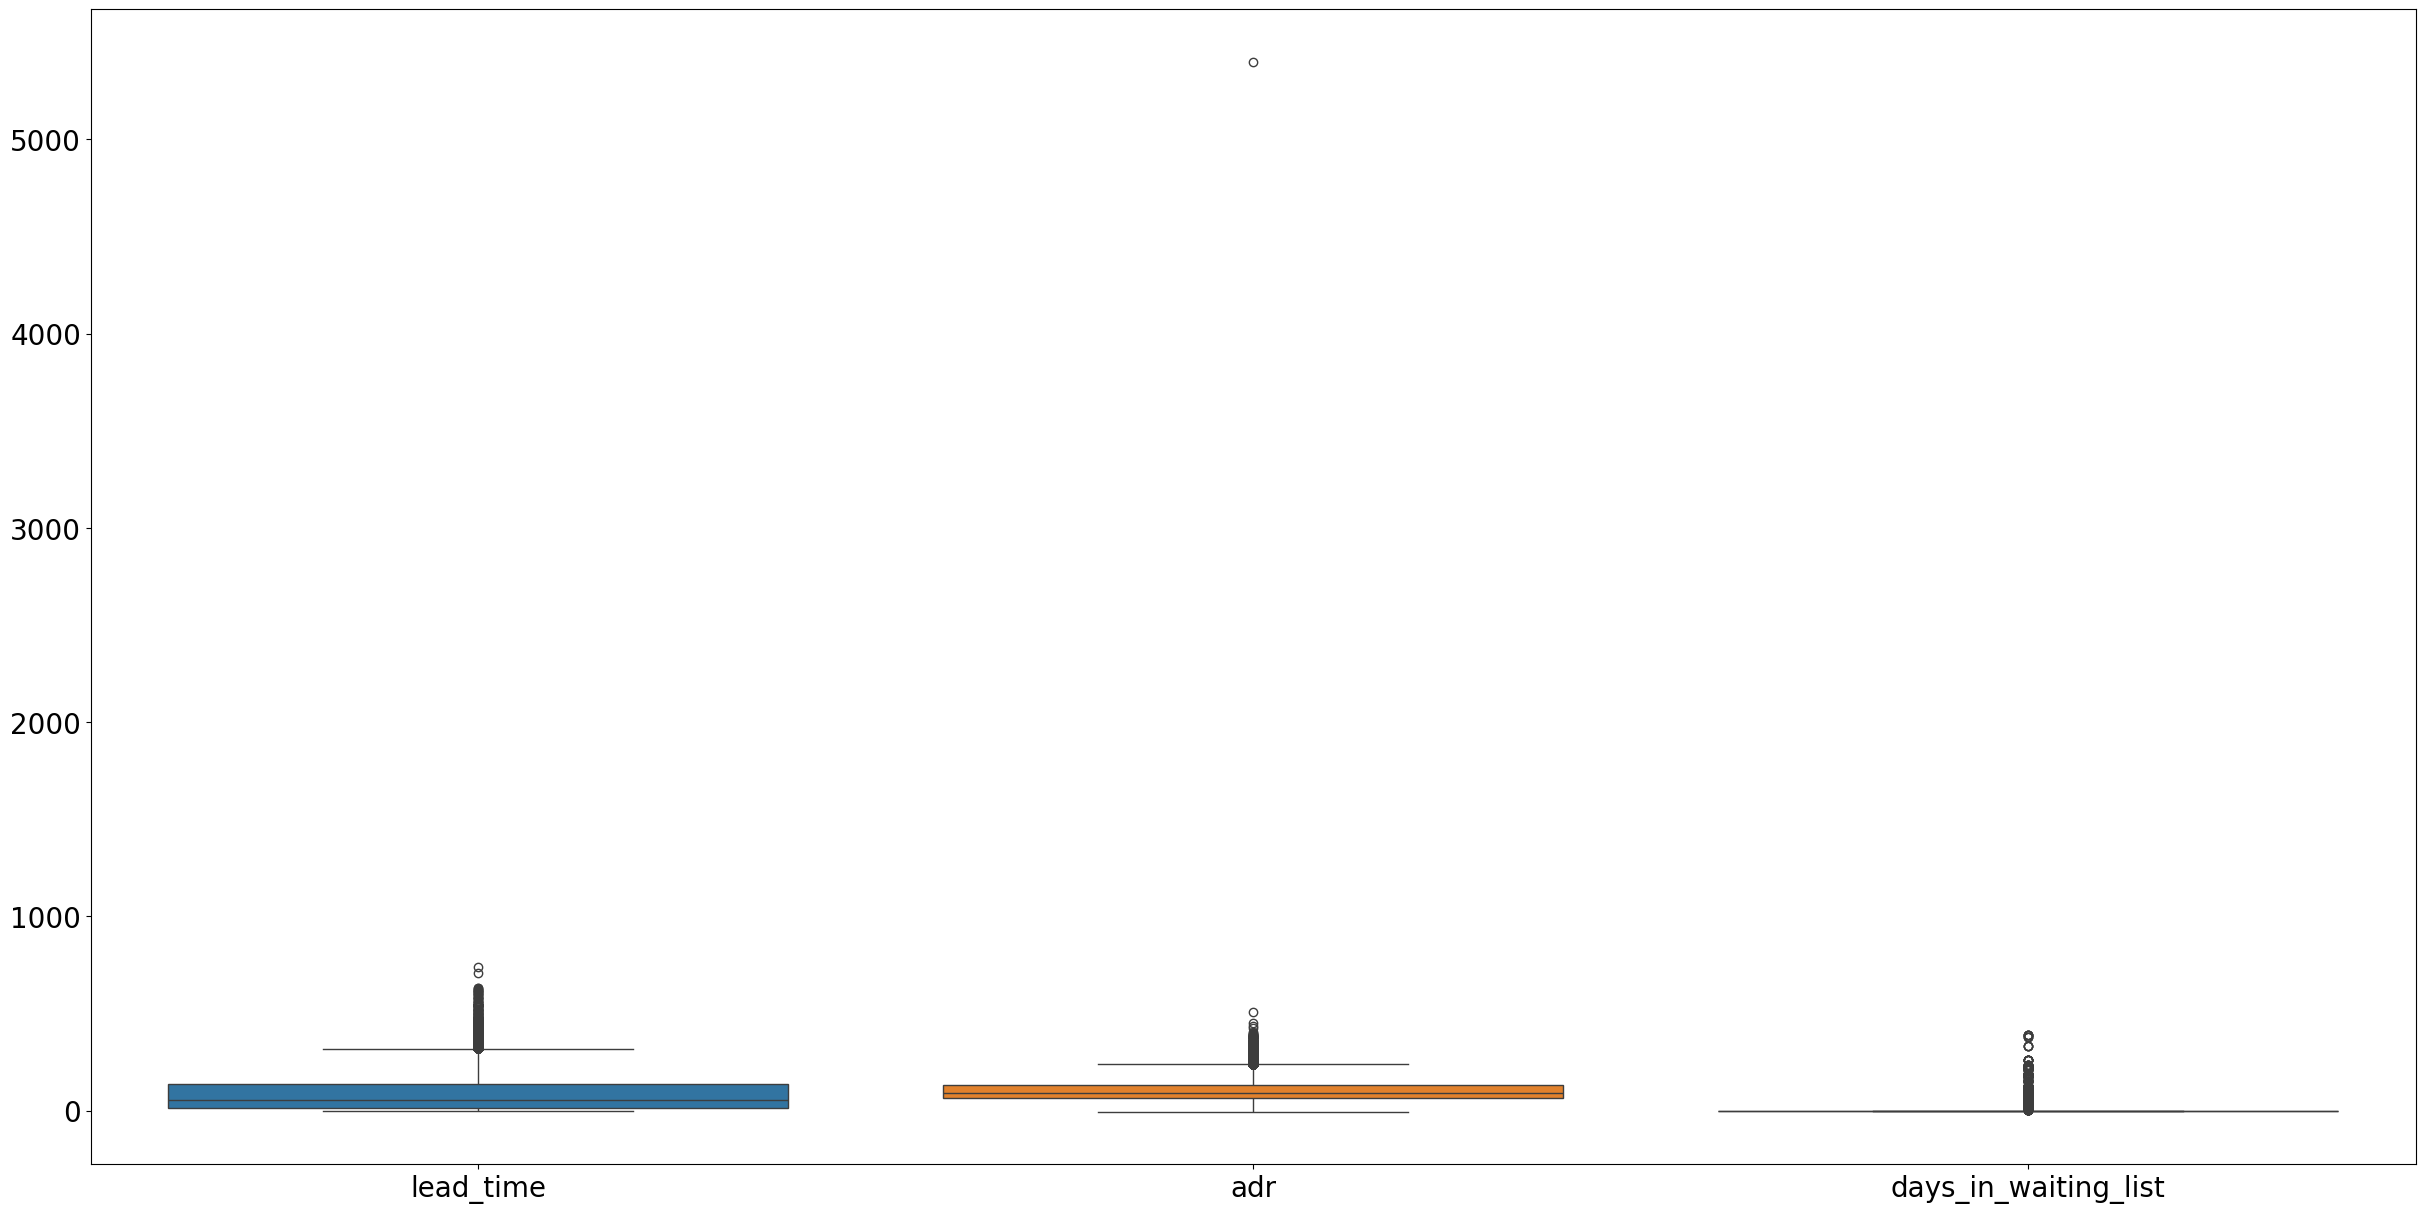

In [47]:
#After checking for each column only in these columns outliers are present
#lead_time, adr, days_in_waiting_list
plt.rc('font', size=20)
plt.figure(figsize=(30,15))
sns.boxplot(data=df1[['lead_time','adr','days_in_waiting_list']])
plt.show()

In [48]:
#removing outlier
def removing_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])  # Quantile function divides the dataset in 25% and 75%
  IQR=q3-q1                          #Interquartile range
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [49]:
#removing outlier from lead_time column
low,high=removing_outlier(df1['lead_time'])
df1['lead_time']=np.where(df1['lead_time']> high,high,df1['lead_time'])
df1['lead_time']=np.where(df1['lead_time']< low,low,df1['lead_time'])
#removing outlier from adr column
low,high=removing_outlier(df1['adr'])
df1['adr']=np.where(df1['adr']> high,high,df1['adr'])
df1['adr']=np.where(df1['adr']< low,low,df1['adr'])
#removing outlier from days_in_waiting list
low,high=removing_outlier(df1['days_in_waiting_list'])
df1['days_in_waiting_list']=np.where(df1['days_in_waiting_list']> high,high,df1['days_in_waiting_list'])
df1['days_in_waiting_list']=np.where(df1['days_in_waiting_list']< low,low,df1['days_in_waiting_list'])



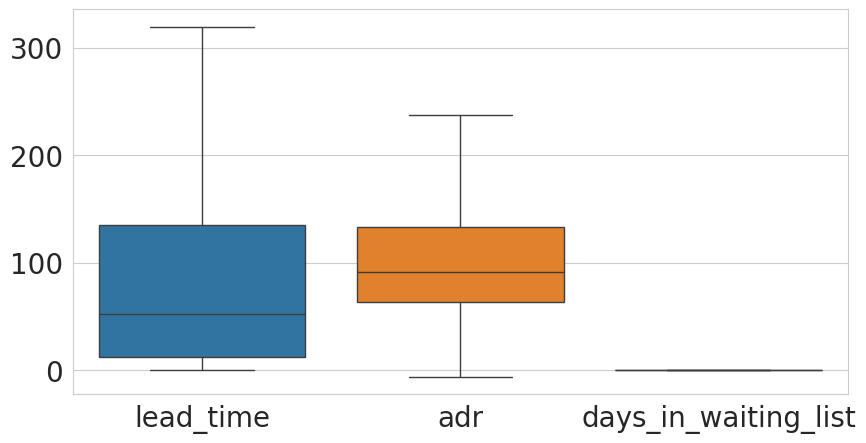

In [50]:
#after removing outlier
sns.set_style('whitegrid')
plt.rc('font',size=20)
plt.figure(figsize=(10,5))
sns.boxplot(data=df1[['lead_time','adr','days_in_waiting_list']])
plt.show()


In [52]:
# Adding 'total_stay' column using 'stays_in_weekend_nights' & 'stays_in_week_nights' columns
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']





In [53]:
#adding 'total_guest' column using 'aduts','children' and 'babies' columns
df1['total_guests']=df1['adults']+df1['children']+df1['babies']

In [ ]:
#adding revenue column
df1['revenue']=df1['total_stay']*df['adr']

In [54]:
#meal contains undefined column which is same as 'SC' so we will combine them
df1['meal'].replace('Undefined','SC',inplace=True)


In [55]:
#find out most common meal type in percentage
df1.meal.value_counts(normalize=True)*100

BB    78.298537
HB    13.250959
SC     7.820267
FB     0.630237
Name: meal, dtype: float64

In [56]:
#most common hotel booked in %age
df1.hotel.value_counts(normalize=True)*100


Resort Hotel    60.303934
City Hotel      39.696066
Name: hotel, dtype: float64

In [57]:
# in which year maximun customer has arrived / peak year for booking
df1.arrival_date_year.value_counts(normalize=True)*100

2016    44.216020
2017    32.797188
2015    22.986792
Name: arrival_date_year, dtype: float64

In [58]:
# peak month of booking where maximun customer arrived
df1.arrival_date_month.value_counts()


August       7697
July         6482
October      5149
September    4931
May          4904
April        4775
June         4351
March        4283
February     3659
December     3547
November     3472
January      3078
Name: arrival_date_month, dtype: int64

In [59]:
#from which country maximum guest arrived
df1.country.value_counts()

PRT    21387
GBR     7517
ESP     5186
FRA     3820
IRL     2346
       ...  
DJI        1
STP        1
KNA        1
HND        1
PAN        1
Name: country, Length: 153, dtype: int64

In [60]:
#most common customer type
df1.customer_type.value_counts(normalize=True)*100

Transient          80.398736
Transient-Party    13.604247
Contract            5.272689
Group               0.724329
Name: customer_type, dtype: float64

In [61]:
#is repeated guest or not
df1.is_repeated_guest.value_counts(normalize=True)*100

0    95.680656
1     4.319344
Name: is_repeated_guest, dtype: float64

In [62]:
#which room is mostly assigned to customers
df1.assigned_room_type.value_counts(normalize=True)*100


A    48.546016
D    25.649766
E    10.385599
F     4.560787
C     3.598566
G     3.550632
B     1.743360
H     1.253373
I     0.633788
K     0.065687
P     0.010652
L     0.001775
Name: assigned_room_type, dtype: float64

In [63]:
#which hotel has highest booking cancelation
cancel=df1[df1['is_canceled']==1].groupby('hotel')
x1=pd.DataFrame(cancel.size()).rename(columns={0:'canceled_booking'})
total_booking=df1.groupby('hotel')
x2=pd.DataFrame(total_booking.size()).rename(columns={0:'total_booking'})
result=pd.concat([x1,x2],axis=1)
result['%age_cancelation']=round((result['canceled_booking']/result['total_booking'])*100,2)
result


,canceled_booking,total_booking,%age_cancelation
hotel,,,
City Hotel,15879,22360,71.02
Resort Hotel,7976,33968,23.48


In [64]:
# average adr of each hotel type
avg_adr = total_booking['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})
avg_adr

,hotel,avg_adr
0,City Hotel,108.450517
1,Resort Hotel,97.686783


### What all manipulations have you done and insights you found?

Firstly of all i found out outliers present in each column and it was found out that out that lead_time,adr,days_in_waiting_list columns has larger outlier present.Then i removed the outlier from each of these columns
I Added 'total_stay' column using 'stays_in_weekend_nights' & 'stays_in_week_nights' columns and 'total_guests' column using 'aduts','children' and 'babies' columns
Then i analysed all the columns and it was found out that :
Around 77% customers has opted for BB type meal
Around 61% customers booked city hotel with maximun average adr
2016 and August was the peak year and month respectively for the booking *Maximum number of customer came from portugal followed by Great Britain,Fance and spain
Around 72% customers were Transient type
Around 97% of the customers were having first booking to the hotel
A type room was assigned to around 52% of the customer
city hotel was having maximum cancelation of the booking (around 30%)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1**-type of hotel booked by customer

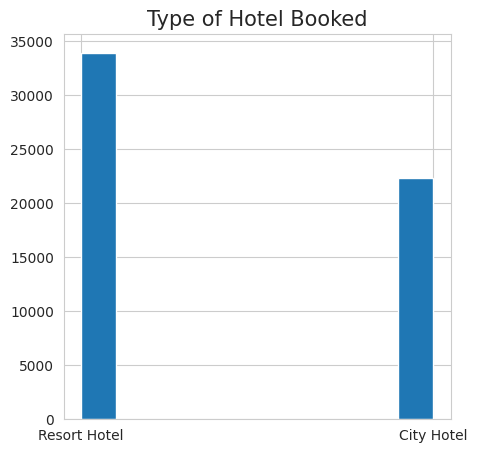

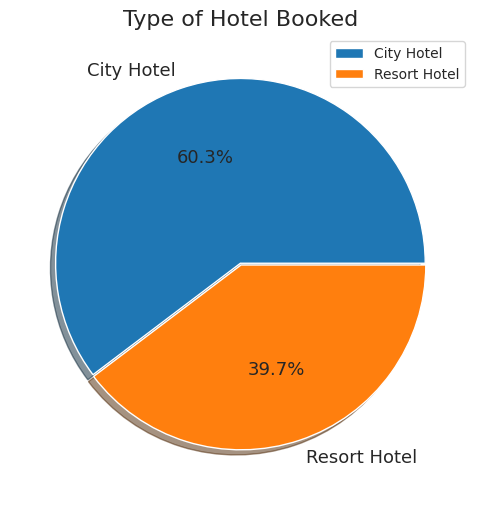

In [65]:
# Chart - 1 visualization code
#using histogram to plot 'Hotel Booking'
sns.set_style('whitegrid')
plt.rc('font',size=10)
plt.figure(figsize=(5,5))
df1['hotel'].hist()
plt.title('Type of Hotel Booked',fontsize=15)
plt.show()
#using pie chats to plot percentage of booking
plt.pie(x=df1.hotel.value_counts(),explode=[0.01,0],labels=['City Hotel','Resort Hotel'],autopct="%0.1f%%",shadow=True,textprops={'fontsize':13})
plt.legend(bbox_to_anchor=(1,1))
plt.title('Type of Hotel Booked',fontsize=16)
plt.show()





##### 1. Why did you pick the specific chart?

I picked up Histogram and pie chart to analyse which type of hotel has maximun booking and by how much percentage

##### 2. What is/are the insight(s) found from the chart?

I found out that City hotel is very commonly booked by the customers and around 60.3% of customer has booked this hotel over a period of 3 years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above observation i think Resort hotel might be little expensive as compared to city hotel, if that is true then resort hotel needs update the price or they can can add other offers with the hotel booking in order to attract more customers
city hotel can also provide more offers so that customers can do repeated booking

#### **Chart - 2**-type of guest distribution in city hotel

In [66]:
# Chart - 2 visualization code

df3 = df1.loc[df1["is_canceled"] == 0].copy()

nan_replacements = {"children": 0}
df3 = df3.fillna(nan_replacements)

df3['total_guests'] = df3['adults'] + df3['children'] + df3['babies']

df3['total_nights'] = df3['stays_in_weekend_nights'] + df3['stays_in_week_nights']

df3['price_per_guest'] = (df3['adr']/df3["total_guests"])





In [67]:

# Set up the pie chart Function

labels = ["babies", "children", "adults"]

def piePlot(data,title):


    plt.pie(data, labels=labels, autopct='%1.1f%%', colors= ['#455d7a','#a7bcb9','#97cba9'])
    plt.title(title)
    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.gca().add_artist(my_circle)
    plt.legend(["babies", "children", "adults"])
    plt.rcParams['font.size'] = 15.0
    plt.rcParams["font.family"] = "serif"
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.show()





In [68]:
#Determine the percentage of guest type staying in city hotel

def sum_guest_type(value):
    type_total = (df3.loc[((df3[value]>=1) & (df3["hotel"]=="City Hotel"))])
    type_total = type_total[value].sum()

    return type_total

total_babies_ch = sum_guest_type("babies")
total_children_ch = sum_guest_type("children")
total_adults_ch = sum_guest_type("adults")
total_guests_ch = sum_guest_type("total_guests")

total_babies_ch, total_children_ch, total_adults_ch, total_guests_ch

(77, 511.0, 10999, 11587.0)

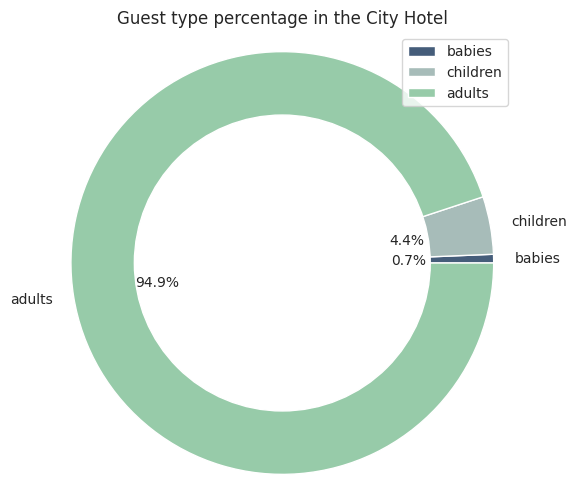

In [69]:
#Determine the percentage of guest type staying in city hotel

def guest_type_percent(value):

    per_cent = round((value / total_guests_ch) * 100, 2)
    return per_cent

percent_babies_ch = guest_type_percent(total_babies_ch)
percent_children_ch = guest_type_percent(total_children_ch)
percent_adults_ch = guest_type_percent(total_adults_ch)

data1 = [percent_babies_ch, percent_children_ch, percent_adults_ch]
piePlot(data1,"Guest type percentage in the City Hotel")


##### 1. Why did you pick the specific chart?

**Reason for choosing the specific chart**:
The pie chart was chosen to visually represent the distribution of guests based on age categories (children, adults, and babies) in the City Hotel. Pie charts are effective for illustrating proportions of a whole, making it suitable for showcasing percentages in this context.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart**:
Majority of the guests are adults, constituting 94.6.5% of the total.
Children make up 4.4% of the guests.
Babies represent only 0.7% of the total guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential positive business impact**:
The insight that most guests are adults (96.5%) can help the hotel tailor their services and amenities to cater primarily to adult clientele. This could involve focusing on amenities such as business centers, fitness facilities, spa services, and adult-oriented entertainment options.
Recognizing the small percentage of children (3.0%) might prompt the hotel to offer family-friendly services and amenities to attract more families with children. This could include facilities such as play areas, kids' clubs, family suites, and child-friendly dining options.

**Potential negative growth insights**:
The very low percentage of babies (0.5%) might suggest that the hotel is not perceived as particularly baby-friendly or lacks amenities suitable for infants. This could potentially deter families with infants from choosing the hotel, leading to missed revenue opportunities.
If the hotel aims to attract families, the low percentage of children compared to adults might indicate that the hotel needs to improve its offerings for families to encourage more bookings. Failure to address this could result in stagnant growth or even a decline in bookings from families, impacting the overall business performance negatively.

#### **Chart - 3**-type of guest distribution in resort hotel

In [70]:
# Chart - 3 visualization code
# set up the pie chart function
#Determine the percentage of guest type staying in city hotel
def sum_guest_type(value):

    type_total = (df3.loc[(df3[value]>=1) & (df3["hotel"]=="Resort Hotel")])
    type_total = type_total[value].sum()

    return type_total

In [71]:
total_babies_rh = sum_guest_type("babies")
total_children_rh = sum_guest_type("children")
total_adults_rh = sum_guest_type("adults")
total_guests_rh = sum_guest_type("total_guests")

total_babies_rh, total_children_rh,total_adults_rh, total_guests_rh

(449, 3042.0, 47867, 51358.0)

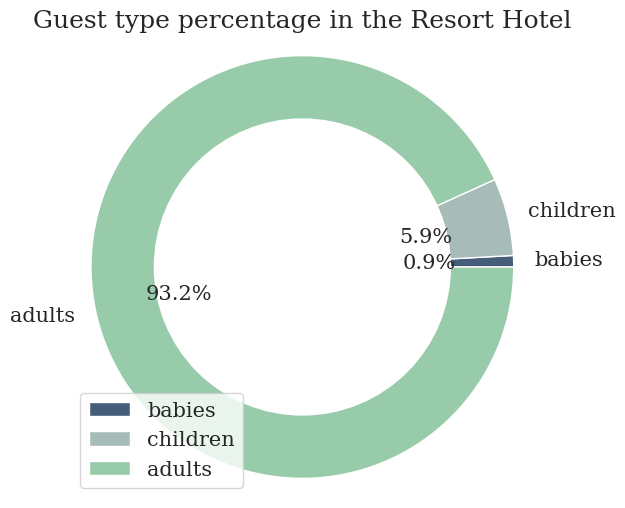

In [72]:
#Determine the percentage of guest type

def guest_type_percent(value):

    per_cent = round((value / total_guests_rh) * 100, 2)
    return per_cent

percent_babies_rh = guest_type_percent(total_babies_rh)
percent_children_rh = guest_type_percent(total_children_rh)
percent_adults_rh = guest_type_percent(total_adults_rh)

data2 = [percent_babies_rh, percent_children_rh, percent_adults_rh]
piePlot(data2,"Guest type percentage in the Resort Hotel")

##### 1. Why did you pick the specific chart?

**Choice of Pie Chart**:
Pie charts are typically used to show the composition of a whole, making them suitable for displaying proportions or percentages of different categories within a dataset.
In this case, if the goal is to visually represent the distribution of guests by age groups (adults, children, babies), a pie chart can effectively illustrate the proportions of each category relative to the total number of guests

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Chart**:
The pie chart reveals that the majority of guests are adults (93.2%), followed by children (5.9%) and a very small percentage of babies (0.9%).
This insight could inform various aspects of business operations, such as marketing strategies, room configurations, amenities, and entertainment options tailored to the predominant age group of guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:
Understanding the demographics of guests can help the resort hotel cater to their needs more effectively, potentially leading to higher guest satisfaction and loyalty.
By tailoring services and amenities to the preferences of adult guests, the hotel may attract more visitors within this demographic segment, contributing to positive growth in revenue and reputation.

**Negative Growth Potential**:
While the insights from the pie chart may generally lead to positive business impacts, there could be potential negative implications if the hotel neglects the needs of minority guest segments, such as children and babies.
Ignoring the requirements of these smaller demographics could result in decreased satisfaction among families with children, leading to negative reviews, decreased occupancy rates, and ultimately, loss of revenue.

#### **Chart - 4**-peak year of booking

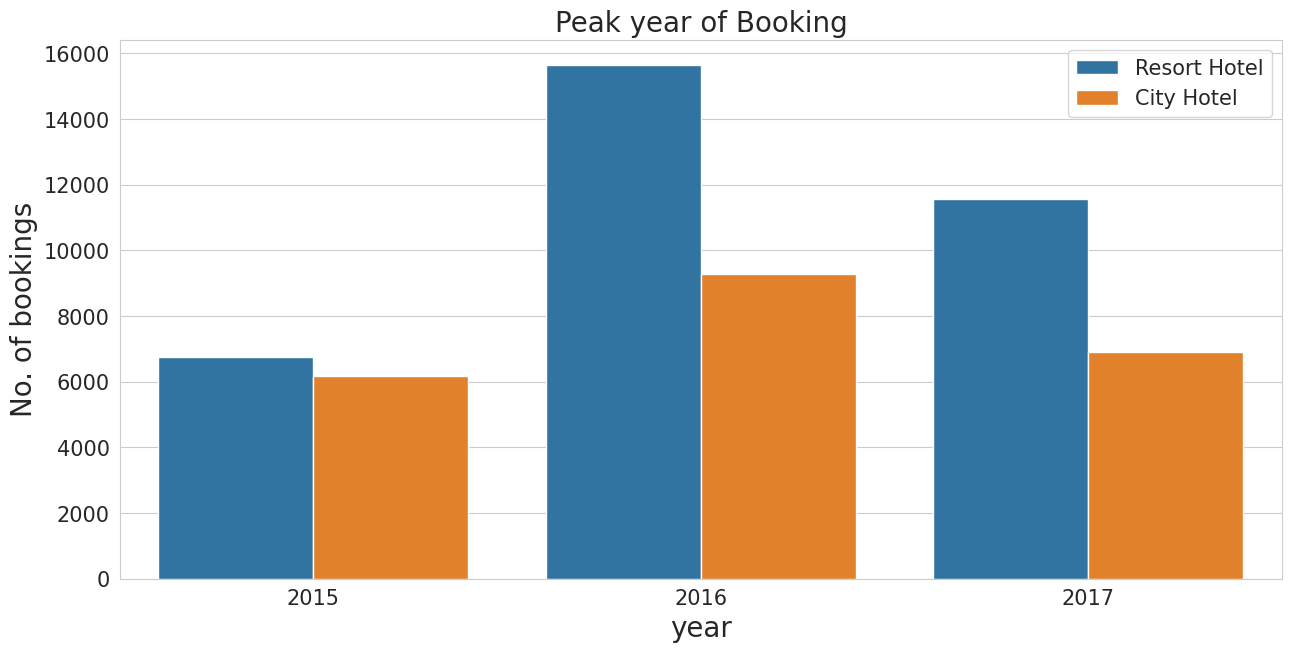

In [73]:
# Chart - 4 visualization code
# To find out peak year of booking
#bivariate analysis
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.rc('font',size=15)
sns.countplot(x='arrival_date_year',data=df1,hue='hotel')
plt.legend()
plt.title('Peak year of Booking',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.ylabel('No. of bookings',fontsize=20)
plt.show()







##### 1. Why did you pick the specific chart?

I have select count plot to find out peak year of booking

##### 2. What is/are the insight(s) found from the chart?

It has been found out that 2016 was the peak year for both the hotels

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Both the Hotels has Earned more revenue in year 2016 but the booking has decreased in 2017 so hotel management needs to look into this matter

#### **Chart - 5**-peak month of booking

<ipython-input-92-da39f71e9668>:19: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in lead_df.groupby(['hotel']):


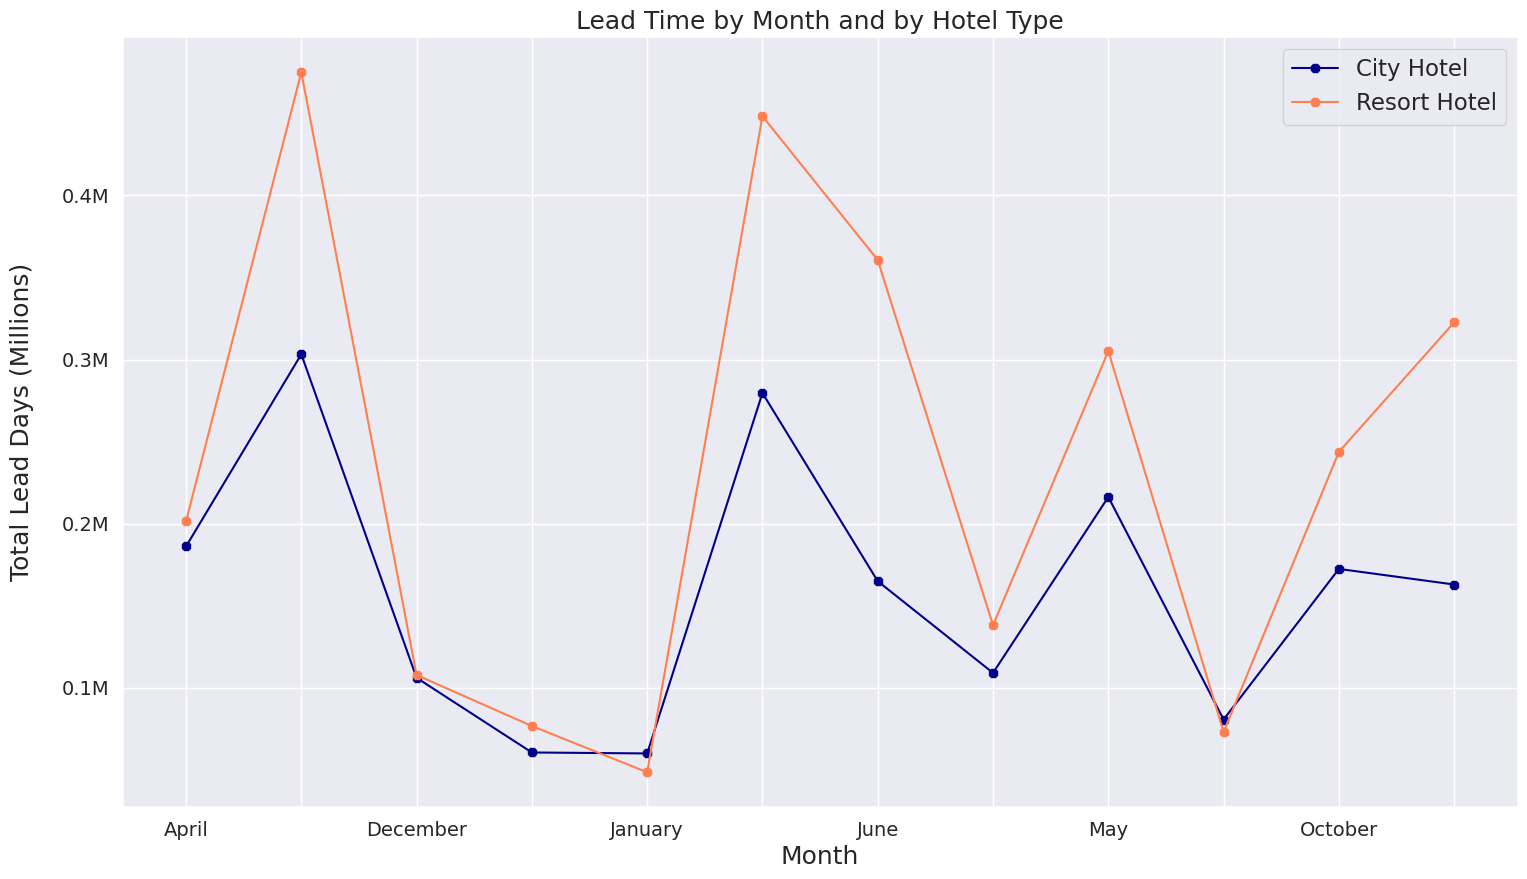

In [92]:
# Chart - 5 visualization code
 #bivariate analysis
# To find out peak month of non cancelled booking

#This  showcases a line plot which has a line to represent the city hotels, and another line for the resort hotels.

from matplotlib.ticker import FuncFormatter

lead_df = df1.groupby(['arrival_date_month','hotel'])['lead_time'].sum().reset_index(name='TotalLead')
lead_df

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(1, 1, 1)

my_colors = {'City Hotel':'darkblue',
             'Resort Hotel':'coral'}


for key, grp in lead_df.groupby(['hotel']):
    grp.plot(ax=ax, kind='line', x='arrival_date_month', y ='TotalLead', color=my_colors[key], label=key, marker='8')

plt.title('Lead Time by Month and by Hotel Type', fontsize=18)
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Total Lead Days (Millions)', fontsize=18, labelpad=20)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14, rotation=0)

ax.set_xticks(np.arange(12))

ax.yaxis.set_major_formatter( FuncFormatter( lambda x, pos:('%1.1fM')%(x*1e-6)))

plt.show()

The x-axis represents the months and the y-axis represents the total lead time. The lead time for every month was summed together to represent which in which months have the most anticipated bookings. The line plot shows that both city and resort hotels are booked at a similar rate. The plot also shows that January is the month with the least amount of lead time, which which is surprising because I assumed people would book New Years vacations well in advanced. This hypothesis was wrong most likely because the frequency of bookings in January is already very low.

##### 1. Why did you pick the specific chart?

I selected lineplot to find out Peak Month of Booking

##### 2. What is/are the insight(s) found from the chart?

It has been found that July and August are the Peak month of Booking

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

July and August has maximun bookings for both type of hotels, The hotel management can advertise maximum in these months and can provide special discounts to attract more customers

#### **Chart - 6**-Booking Cancellation Year-wise

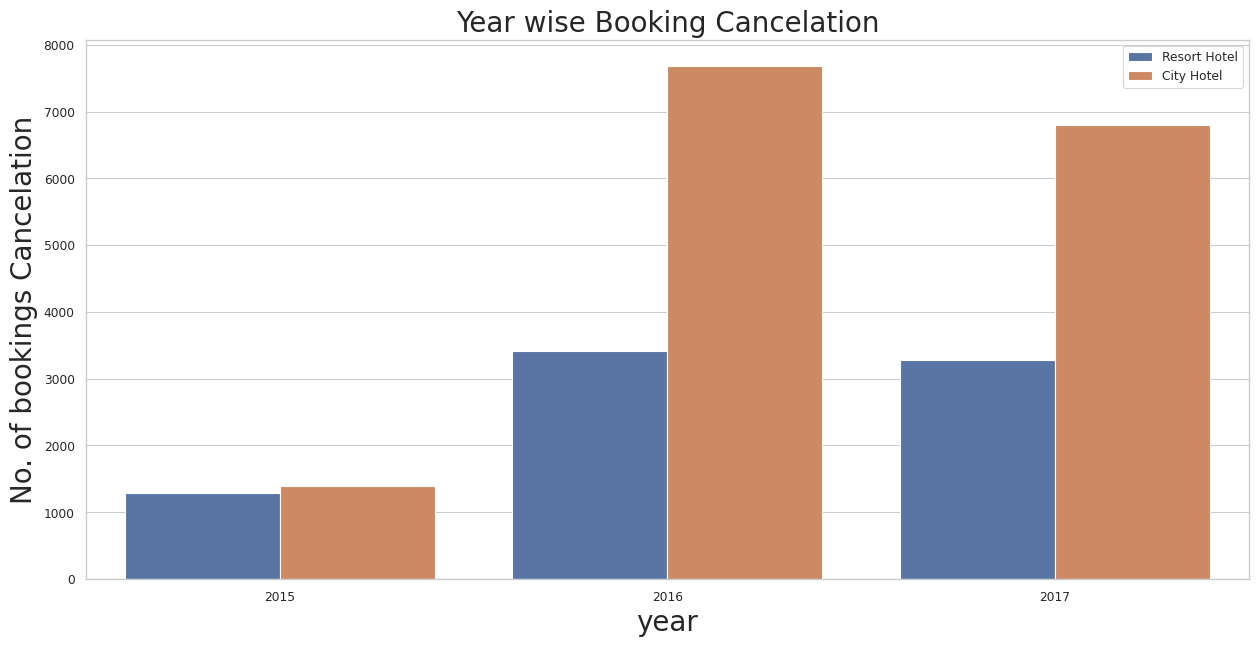

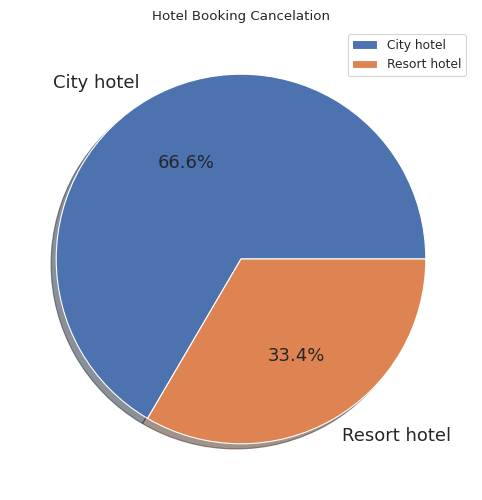

In [89]:
# Chart - 6 visualization code
# To find out year wise cancelaltion
#bivariate analysis
df3=df1[df1['is_canceled']==1]
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
plt.rc('font',size=15)
sns.countplot(x=df3['arrival_date_year'],hue=df3['hotel'])
plt.legend()
plt.title('Year wise Booking Cancelation',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.ylabel('No. of bookings Cancelation',fontsize=20)
plt.show()
#using pie chart to find out %age of Booking cancelation over 3 years
plt.pie(x=df3.hotel.value_counts(),labels=['City hotel','Resort hotel'],autopct="%0.1f%%",shadow=True,textprops={'fontsize':13})
plt.legend(bbox_to_anchor=(1,1))
plt.title('Hotel Booking Cancelation')
plt.show()

##### 1. Why did you pick the specific chart?

I selected countplot and pie chart to find out which year hotel has maximun cancelation and in which year

##### 2. What is/are the insight(s) found from the chart?

It has been find out that City Hotel has around 66.6% of booking cancelation over 3 year and maximum cancelation was in year 2016
Resort hotel has around 33.4% of booking cancelation and maximun was in year 2016

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hotel management needs to find out why booking cancelation was so much in year 2016

#### **Chart - 7**-Top 15 Visiting Countries

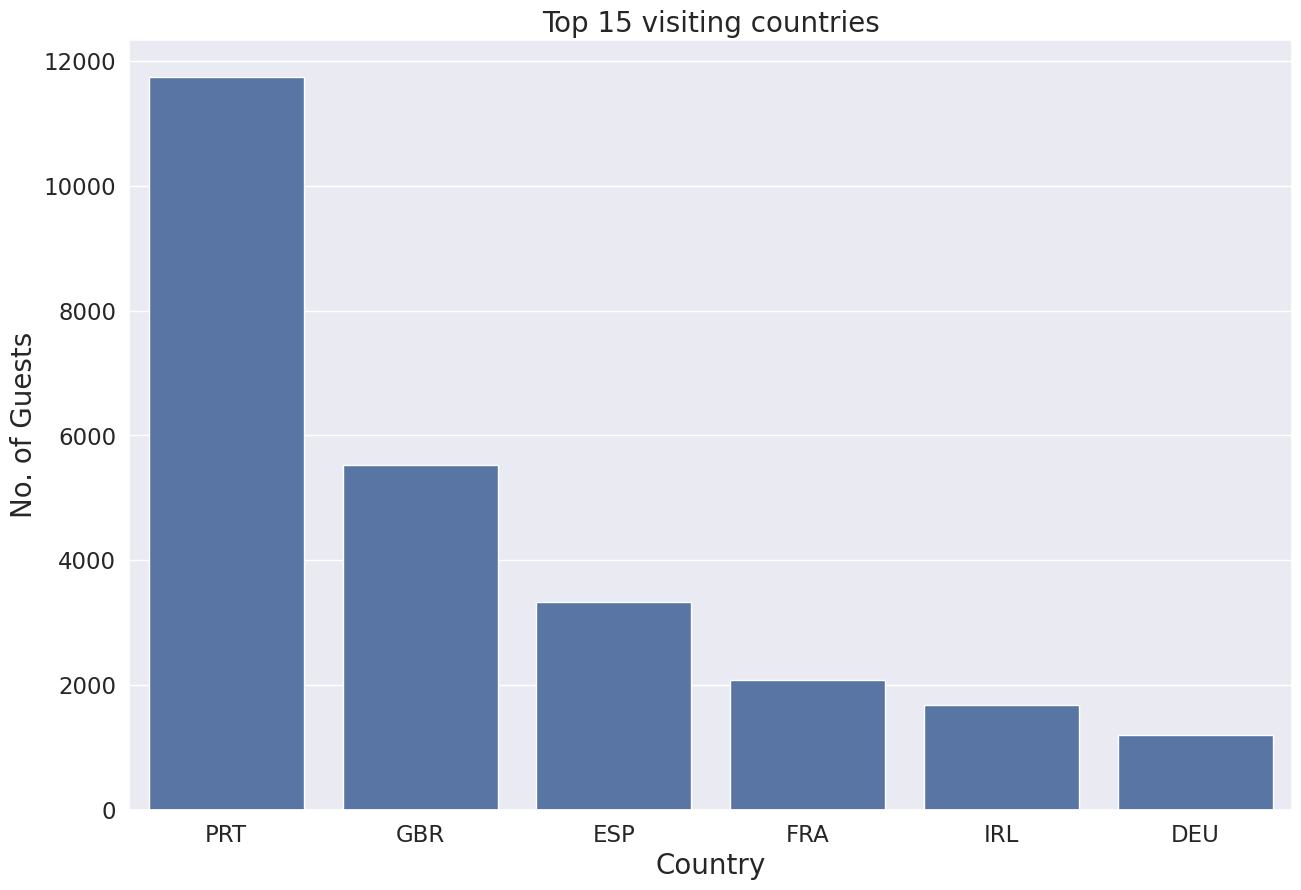

In [90]:
# Chart - 7 visualization code
#Bivariate Analysis
#to find out Top 15 visiting countries
guest_country=df2['country'].value_counts().reset_index()
guest_country.rename(columns={'index':'country_name','country':'No. of guests'},inplace=True)
g1=guest_country[guest_country['No. of guests']>650]  #to get top 15 countries
plt.figure(figsize = (15,10))
sns.set(font_scale=1.5)
sns.barplot(x = g1['country_name'], y=g1['No. of guests'])
plt.title('Top 15 visiting countries',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('No. of Guests',fontsize=20)
plt.show()



##### 1. Why did you pick the specific chart?

I Picked seaborn barplot to visualize contry and no. of guests from each country

##### 2. What is/are the insight(s) found from the chart?

It has been observed that customers come from all over the world in these two hotels but more than 50% of the customer belongs to Portugal,Great Brtain and France

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since most of the guests visiting the hotel belongs to Portugal and other European Countries so, the Hotel management should advertize more in these countries only

#### **Chart - 8**-Distribution Of Booking

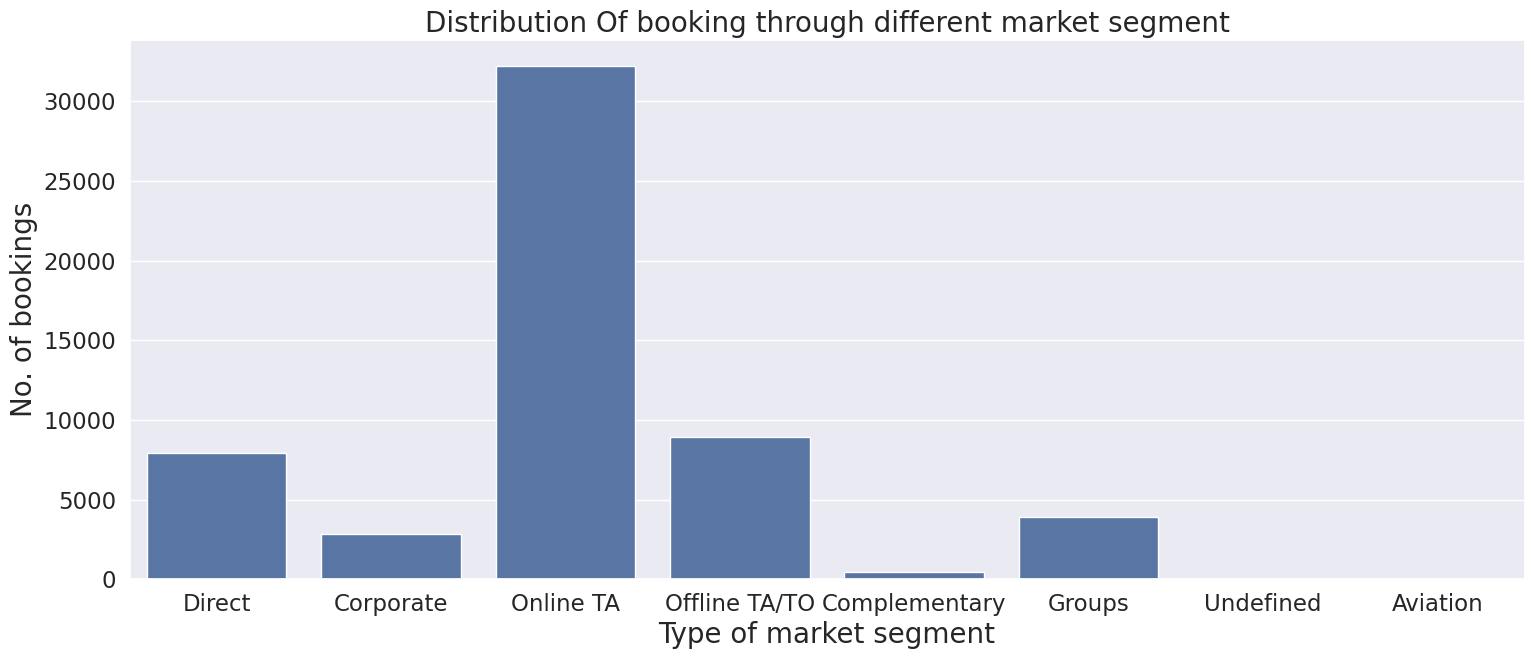

In [94]:
# Chart - 8 visualization code

#find distribution of booking through different market segment
plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.rc('font',size=10)
sns.countplot(x='market_segment',data=df1)
plt.title('Distribution Of booking through different market segment',fontsize=20)
plt.xlabel('Type of market segment',fontsize=20)
plt.ylabel('No. of bookings',fontsize=20)
plt.show()



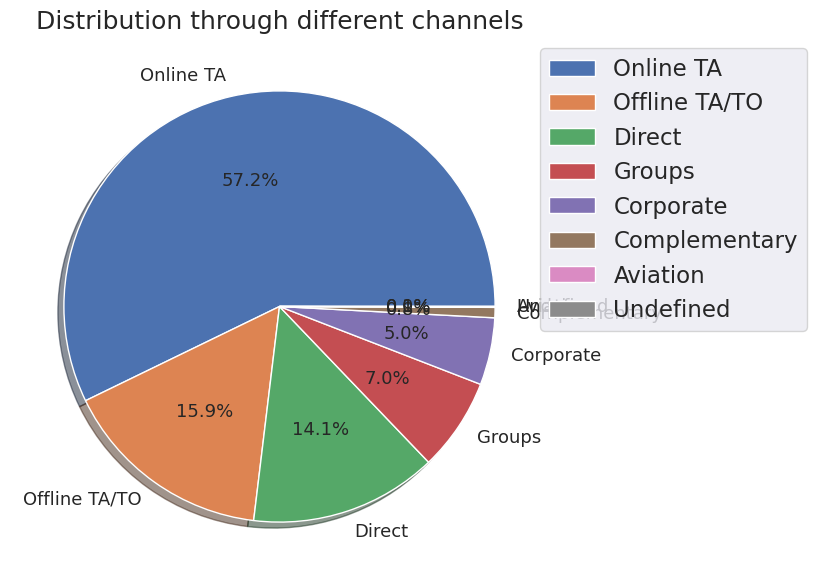

In [95]:
#using pie chart to findout percentage
plt.figure(figsize=(7,7))
plt.pie(df1.market_segment.value_counts(),labels=['Online TA','Offline TA/TO','Direct','Groups','Corporate','Complementary','Aviation','Undefined'],autopct="%0.1f%%",shadow=True,textprops={'fontsize':13})
plt.legend(bbox_to_anchor=(1.5,1))
plt.title('Distribution through different channels')
plt.show()

The x-axis represents the months and the y-axis represents the total lead time. The lead time for every month was summed together to represent which in which months have the most anticipated bookings. The line plot shows that both city and resort hotels are booked at a similar rate. The plot also shows that January is the month with the least amount of lead time, which which is surprising because I assumed people would book New Years vacations well in advanced. This hypothesis was wrong most likely because the frequency of bookings in January is already very low.

##### 1. Why did you pick the specific chart?

I have selected countplot and pie chart to analyze distribution of booking through different market segment

##### 2. What is/are the insight(s) found from the chart?

Around 57.2% of the booking is done by online Travel Agent followed by the 15.9% offline Travel agent

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Efforts should be made by the Hotel management to attract customers to book from company website directly

##### **Chart - 9**- Preferred Booking Channel

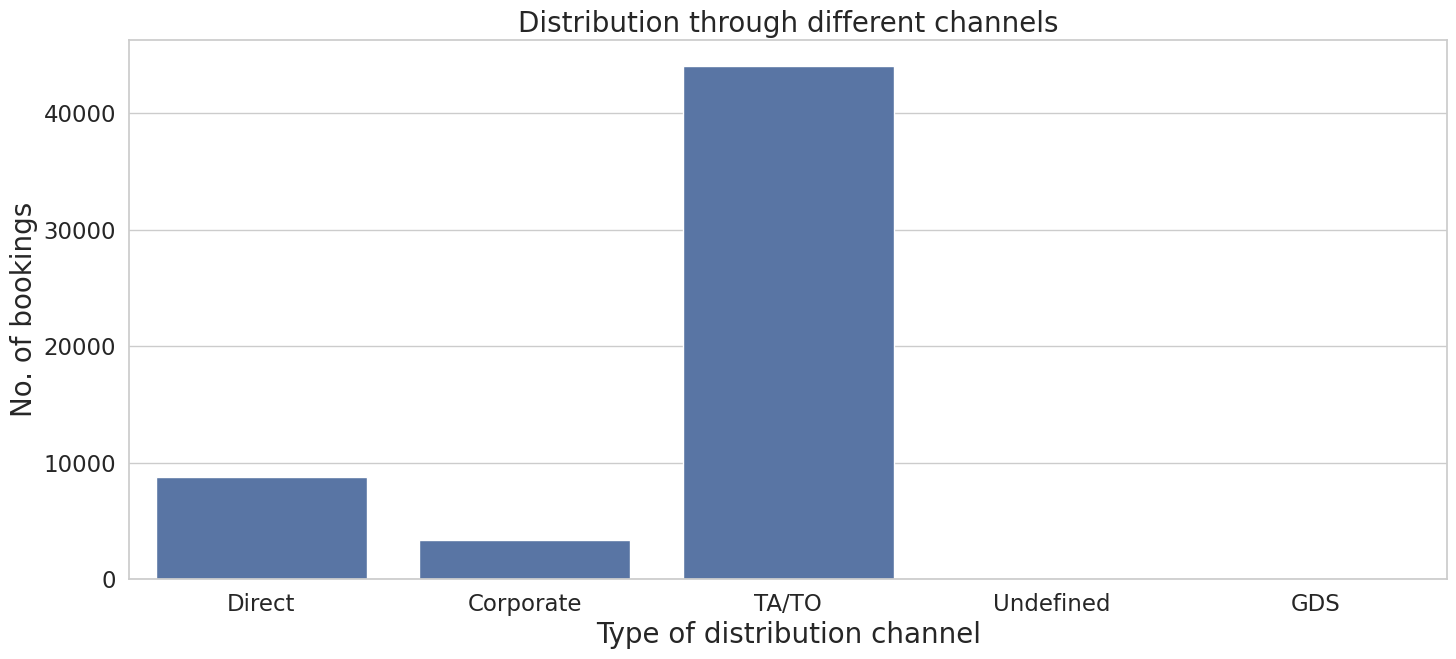

In [98]:
# Chart - 9 visualization code
# To know most preferred distribution channel for booking
plt.figure(figsize=(17,7))
sns.set_style('whitegrid')
plt.rc('font',size=15)
sns.countplot(x='distribution_channel',data=df1)
plt.title('Distribution through different channels',fontsize=20)
plt.xlabel('Type of distribution channel',fontsize=20)
plt.ylabel('No. of bookings',fontsize=20)
plt.show()

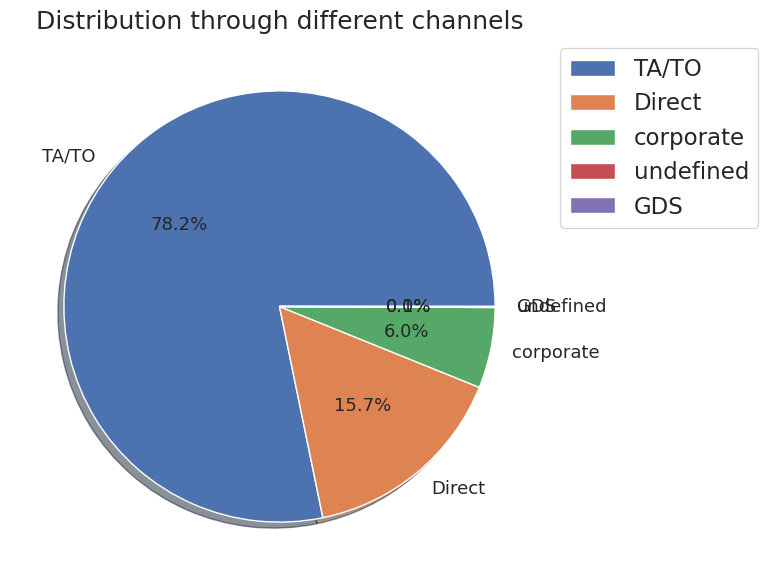

In [99]:
#using pie chart to find out percentage distribution among different channels
plt.figure(figsize=(7,7))
plt.pie(df1.distribution_channel.value_counts(),labels=['TA/TO','Direct','corporate','undefined','GDS'],autopct="%0.1f%%",shadow=True,textprops={'fontsize':13})
plt.legend(bbox_to_anchor=(1,1))
plt.title('Distribution through different channels')
plt.show()

##### 1. Why did you pick the specific chart?

I picked up seaborn countplot to analyze which type of distribution mostly used by the customers for booking and by using pie chart percantage distribution was found

##### 2. What is/are the insight(s) found from the chart?

It was found out that 78.2% of hotel booking is done by travel agents/travel operators followed by the Direct i.e 15%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The hotel management can offer discounts, complimentary services and offers on direct bookings as the hotel doesn’t pay commissions to third parties and maintains a direct relationship with the customer when a customer books the hotel directly.

#### **Chart - 10**-guest repeating status

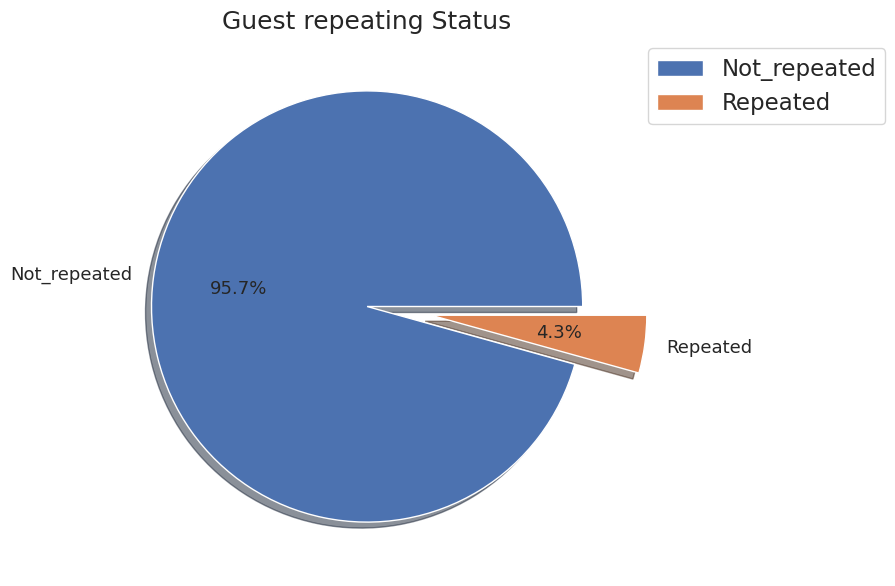

In [100]:
# Chart - 10 visualization code
#univariate analysis
#To check how much percentage of customers repeats the hotel booking
plt.figure(figsize=(7,7))
plt.pie(df1.is_repeated_guest.value_counts(),labels=['Not_repeated','Repeated'],explode=[0,0.3],autopct="%0.1f%%",shadow=True,textprops={'fontsize':13})
plt.legend(bbox_to_anchor=(1,1))
plt.title('Guest repeating Status')
plt.show()

##### 1. Why did you pick the specific chart?

I have choosen pie chart to find put how much percentage of guests has booked the hotel repeatedly and how much has first visit

##### 2. What is/are the insight(s) found from the chart?

I found out that only 4.3% of the guests has done repeated booking over these 3 years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Hotel management can start membership plans and give spcial offers for the repeated customers

####**Chart - 11**-Room assigned to customer

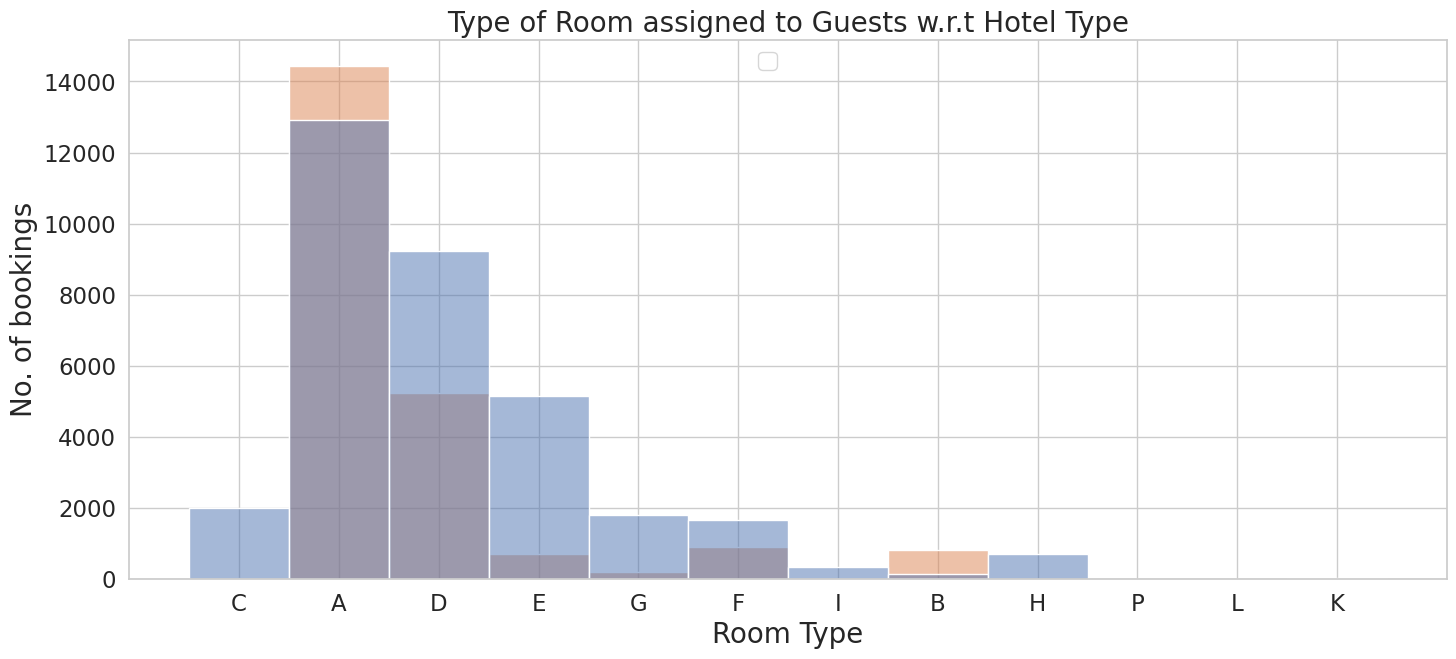

In [107]:
# Chart - 11 visualization code
#bivariate analysis
#To find out Type of room assigned to the Guests w.r.t hotel type
plt.figure(figsize=(17,7))
sns.set_style('whitegrid')
plt.rc('font',size=15)
sns.histplot(x='assigned_room_type',data=df1,hue='hotel')
plt.legend(bbox_to_anchor=(.5,1))
plt.title('Type of Room assigned to Guests w.r.t Hotel Type',fontsize=20)
plt.xlabel('Room Type',fontsize=20)
plt.ylabel('No. of bookings',fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

I have choosen histplot to find out which type of room is mostly assigned to Guests

##### 2. What is/are the insight(s) found from the chart?

It has been find out that in both hotels A type of Room is mostly assigned to guests followed by the D type Room

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has find out that among all room types A and D are most commonly assigned to the Guest ,may be because of economical and better services

####**Chart - 12**-customer type

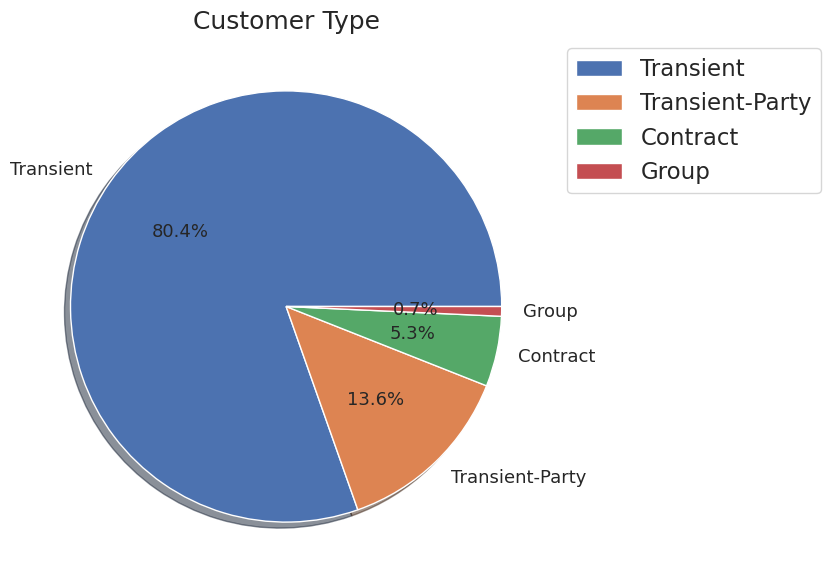

In [108]:
# Chart - 12 visualization code
#univariate Analysis
#Find out which type of customer has highest booking
plt.figure(figsize=(7,7))
plt.pie(df1.customer_type.value_counts(),labels=['Transient','Transient-Party','Contract','Group'],autopct="%0.1f%%",shadow=True,textprops={'fontsize':13})
plt.legend(bbox_to_anchor=(1,1))
plt.title('Customer Type')
plt.show()

##### 1. Why did you pick the specific chart?

I have selected pie chart to find put most common type of customer



##### 2. What is/are the insight(s) found from the chart?

It has been find out that Transient type of customer has made around 82% of booking over these 3 years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here since very less people comes in groups so Hotel management can start any family/group package to attract more customers

####**Chart - 13**-Preferred Meal Type

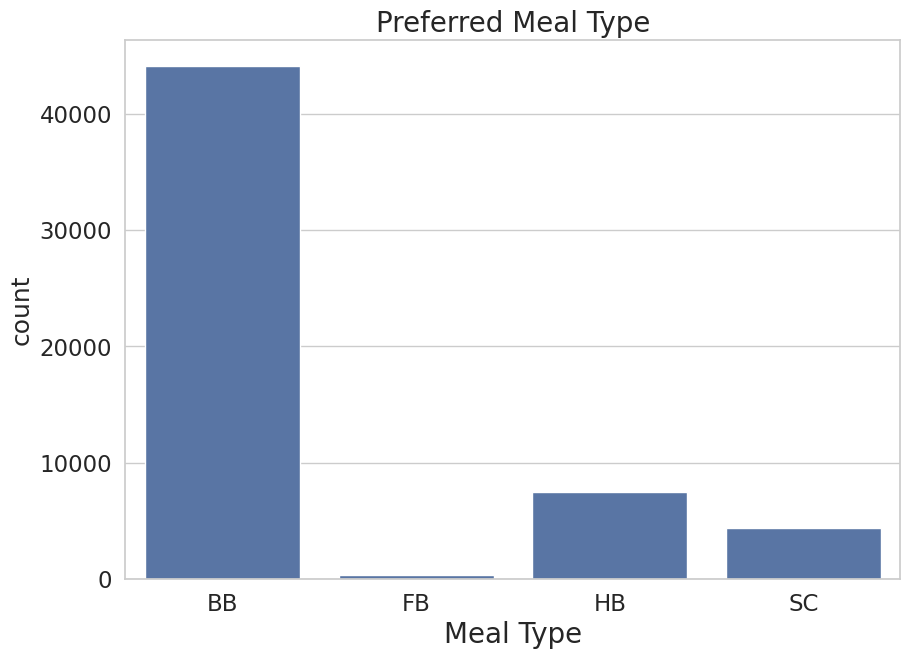

In [110]:
# Chart - 13 visualization code
# let us see the proprtion of type of meal packages
#Undefined/SC — no meal package;
#BB — Bed & Breakfast;
#HB — Half board (breakfast and one other meal — usually dinner);
#FB — Full board (breakfast, lunch and dinner)

sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type',fontsize=20)
plt.title('Preferred Meal Type',fontsize=20)
plt.show()


We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well. This further indicates the presence of popular restaurents around the hotels.

##### 1. Why did you pick the specific chart?

The specific chart chosen is a pie chart, which is suitable for displaying the distribution of categorical data. In this case, it is used to visualize the distribution of different types of meals.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the distribution of meal types offered by hotels.We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well. This further indicates the presence of popular restaurents around the hotels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impacts**:

Understanding the distribution of meal types can help hotel management tailor their offerings to better match customer preferences.
It can also inform marketing strategies, allowing hotels to highlight popular meal options in their promotions and advertisements.

**Negative growth insights**:

The explode parameter used in the pie chart can distort the perception of the distribution. While it may highlight certain categories, it could also obscure the actual proportions, leading to misinterpretation.
If the explode parameter disproportionately emphasizes certain meal types, it could lead to misguided business decisions, such as overinvesting in less popular options or neglecting potentially lucrative ones.

####**Chart - 14** - Correlation Heatmap

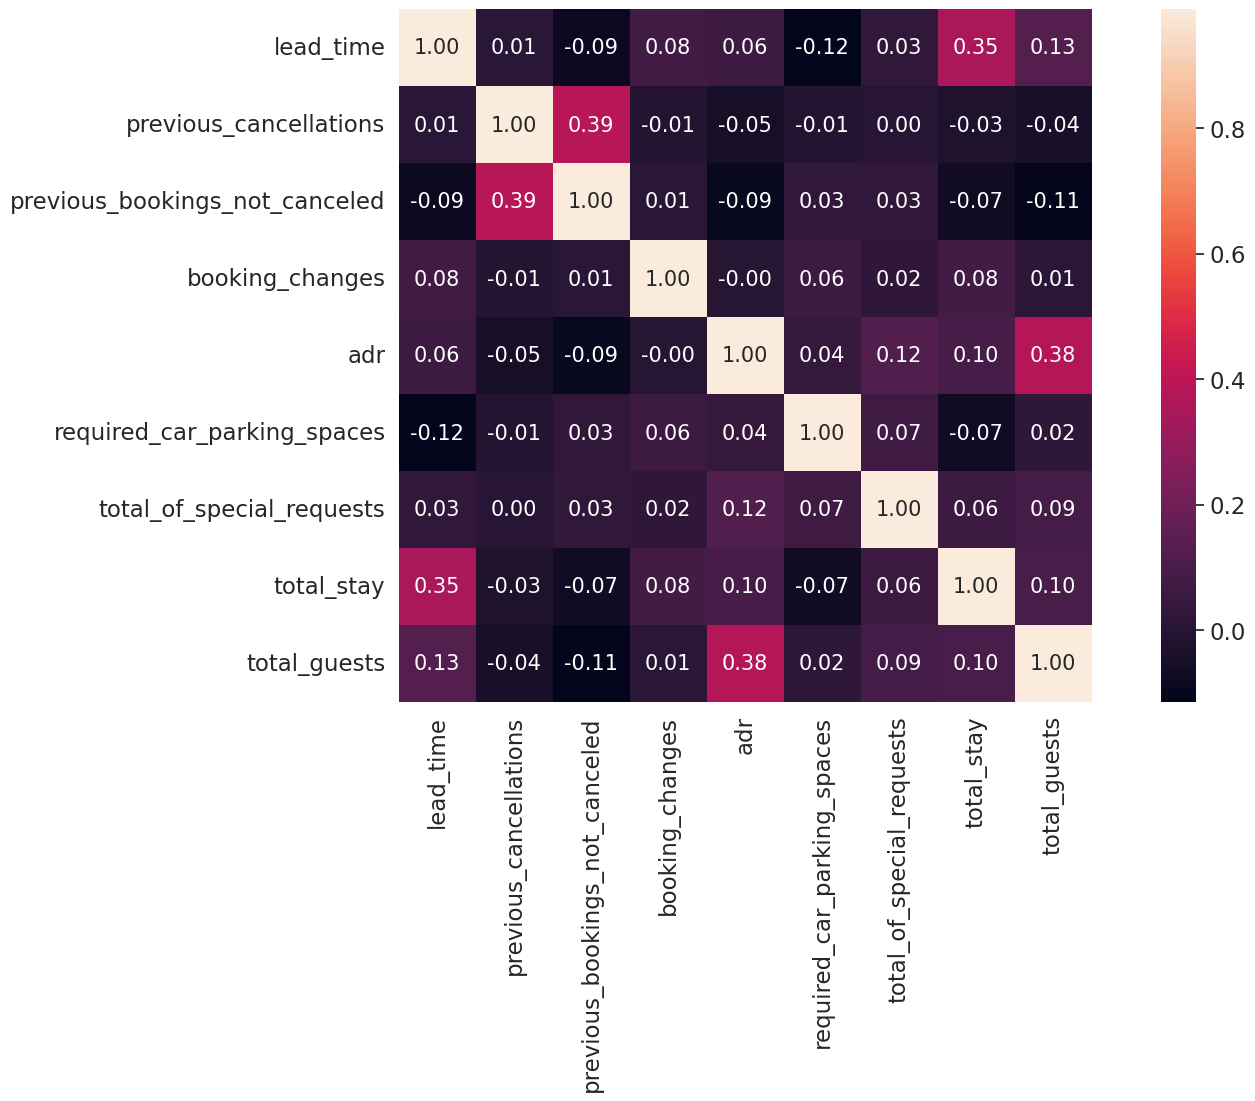

In [115]:

# Correlation Heatmap visualization code
dcorr = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_guests']]
df_corr = dcorr.corr()
f, ax = plt.subplots(figsize = (18,9))
sns.heatmap(df_corr, annot = True, fmt='.2f', annot_kws =  {'size': 15}, vmax = .99, square = True)
plt.show()


##### 1. Why did you pick the specific chart?

In order to find out co-relation between the variables



##### 2. What is/are the insight(s) found from the chart?

Total stay and the lead time have positive correlation, that means if customer plans to stay for longer they will do booking in advance
ADR is positively correlated with total_people, more people means revenue

#### Chart - 15 - Pair Plot

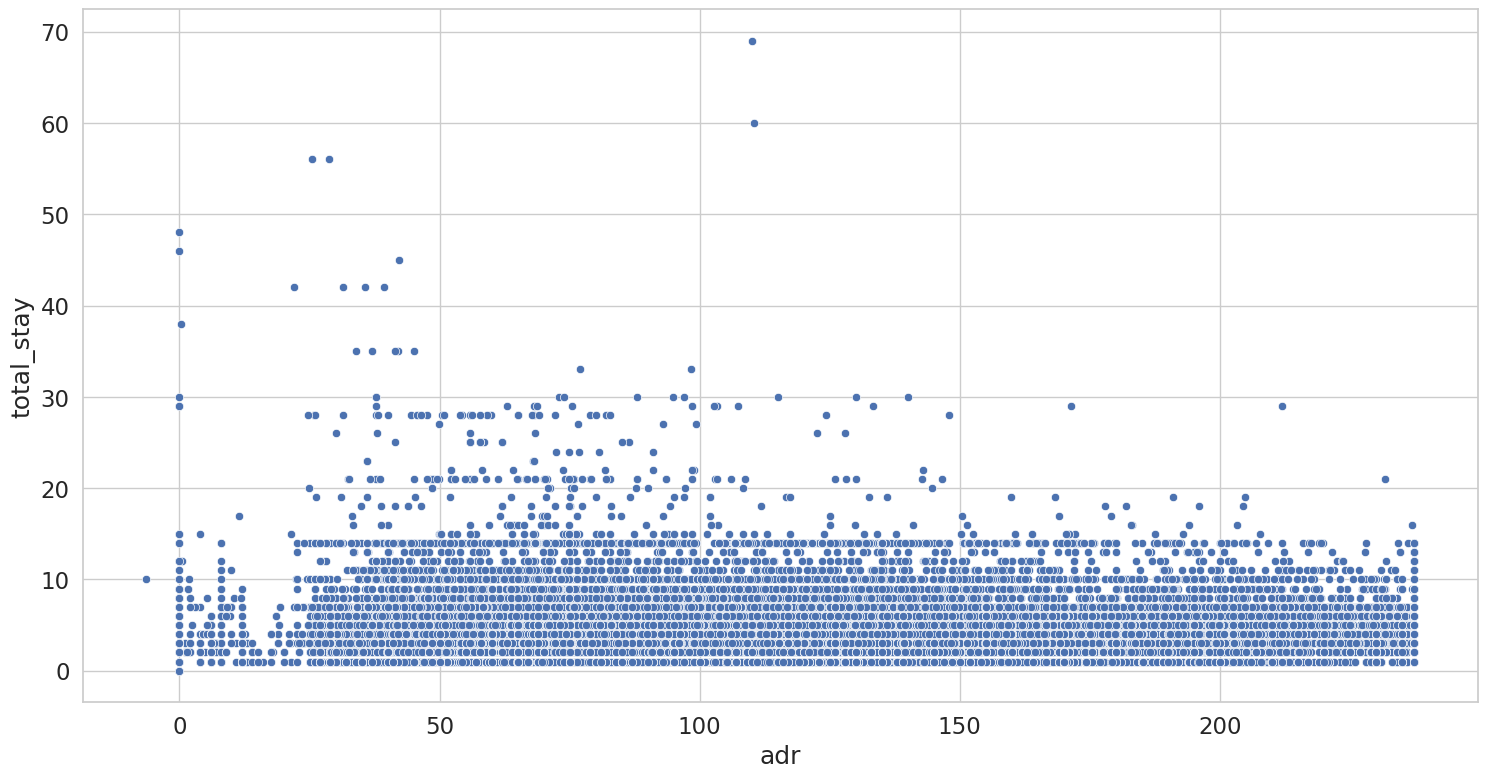

In [116]:
# Pair Plot visualization code

#scatter plot between adr and total_stay
plt.figure(figsize = (18,9))
sns.scatterplot(x= 'adr', y = 'total_stay', data = df1)
plt.show()

##### 1. Why did you pick the specific chart?

To compare the relationship between adr and total stay

##### 2. What is/are the insight(s) found from the chart?

Here it can be seen that if Guest stay is higher adr is decreasing, so longer stay customer is getting better deal

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

I suggst following step to be taken to achieve business objectives

* The Hotel management can offer special packages which includes meal and other facilities to attract more travellers

* The Hotel management can also start membership plan with special discount to retain customers

* The Hotel management should look deeply into the reason why customer cancels the booking and should try to minimize the cancelation

* Hotel management should use social media to advertize more particulary in peak season

* The hotel management should collabrate with online/offline TA/TO and with other booking partners to get more customers

* Hotel management should focus that maximum booking should be done on company website or app

* The Hotel management can start attractive offers towards group booking and longer stay

* The hotel management should try to put more effort on analyzing every customer feedback in order to improve facilities

* In offseason the hotel management should provide special discount,in order to get customers in that season

* The management should make deposit compulsory in order to secure the booking




# **Conclusion**

City Hotel is more likely booked by the customers and generates more revenue
Bed & Breakfast is most prefered meal type opted by the customers
2016 was the peak of booking for both the hotels
July and August was the peak month of booking for both the hotels
2-4 days is the average preferred length of stay in the hotel
Maximun number of guests visiting the hotel belongs to portugal,Great Britain and France
Room Type A is most preferred room assigned to the Guests
G and H Type of room generates more revenue
Majority of the Guests has first time visit to hotel
Around 25-30% of the booking is getting canceled and more cancelation are from city hotel
Transient Type of customers has done more bookings
Majority of the customers has opted for No deposit
Most number of guests don't have any special request
Online trvel agent has more market segment for booking
Total stay and lead time are positively correlated to each other
longer stay customer is getting better deal

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***